In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [46]:
df = pd.read_csv(r'~\Box\STAT 222 Capstone\Raw Data\Earnings call from web\earning_call_web.csv')

In [47]:
print(df.shape)
print(df.columns)
df["date"] = pd.to_datetime(df["date"])

(18346, 6)
Index(['Unnamed: 0', 'symbol', 'quarter', 'year', 'date', 'content'], dtype='object')


In [48]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,symbol,quarter,year,date,content
0,BCE,4,2012,2013-02-07 17:00:00,Thane Fotopoulos: Good morning everybody. I am...
1,BCE,3,2012,2012-11-01 13:00:49,Executives: Thane Fotopoulos George Alexander ...
2,BCE,2,2012,2012-08-08 15:00:00,Executives: Thane Fotopoulos George A. Cope - ...
3,BCE,4,2013,2014-02-06 17:30:09,Executives: Thane Fotopoulos George Alexander ...
4,BCE,3,2013,2013-11-07 15:00:00,Executives: Thane Fotopoulos George Alexander ...


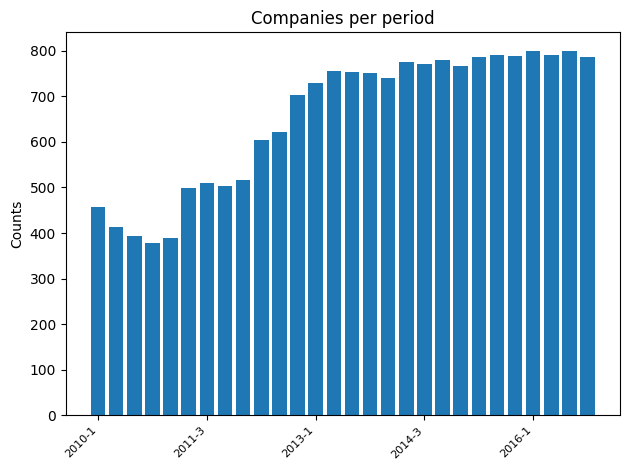

In [8]:
company_by_date = []
group_yq = df.groupby(["year", "quarter"])["symbol"].nunique().reset_index()
group_yq["period"] = group_yq['year'].astype(str) + "-" + group_yq['quarter'].astype(str)
n = 6


plt.bar(group_yq['period'].tolist(), group_yq['symbol'].tolist())
plt.title("Companies per period")
plt.ylabel('Counts')
plt.xticks([i for i in range(len(group_yq["period"])) if i % n == 0], 
           [label for i, label in enumerate(group_yq["period"]) if i % n == 0],
           rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [14]:
df.symbol.value_counts(ascending= True).head(15)

symbol
SITE    1
GWRS    1
ADSW    1
DFIN    1
FTV     1
CCU     1
PED     1
INSW    1
HZN     2
TGLS    2
INFO    2
BW      3
WBT     3
GLPG    3
EPC     3
Name: count, dtype: int64

### Date Verification

In [14]:
df.sort_values(by = "date").head()

,Unnamed: 0,symbol,quarter,year,date,content
10396,10396,NVDA,1,2010,2009-05-08 01:50:29,Executives: Michael Hara - Investor Relations ...
16593,16593,ADSK,1,2010,2009-05-21 20:48:16,Executives: David Gennarelli - Director of Inv...
13651,13651,LDOS,1,2010,2009-06-03 20:43:37,Executives: Stuart Davis - Senior Vice Preside...
15357,15357,SCS,1,2010,2009-06-23 15:11:40,Executives: Raj Mehan - Director IR Jim Hacke...
7085,7085,RAD,1,2010,2009-06-24 14:47:21,Executives: Chris Hall - Senior Vice President...


### Good Cases

In [26]:
# Good
# Company: NVDA
# Year & quarter: 2010 1
# Actual quarter: 2010 1
# Date: 2009-05-08
# Actual Date: 2009-05-08 (checked with transcripts)
print(df.iloc[10396, -1])

Executives: Michael Hara - Investor Relations Jen-Hsun Huang - President, Chief Executive Officer and Director David White - Chief Financial Officer  Marvin D. Burkett - Senior Advisor
Analysts: Daniel Berenbaum - Auriga Hans Mosesmann - Raymond James Glen Yeung - Citigroup  Uche Orji - UBS  Rajvindra Gill - Needham & Company Patrick Newton - Stifel Nicolaus  Alex Gana - GMP Securities Jim Schneider - Goldman Sachs Craig Berger - Friedman, Billings, Ramsay Shawn Webster - J.P. Morgan David Wu - Global Crown Capital  Suji DeSilva - Kaufman Brothers 
Operator: Good afternoon, ladies and gentlemen. Thank you for holding. I would now like to turn the call over to Michael Hara, Vice President, Investor Relations. Thank you, sir. You may begin. 
Michael Hara: Thank you, Shannon. Good afternoon and welcome to NVIDIA's conference call for the first quarter of fiscal 2010 ended April 26, 2009. Today’s call is being recorded. If you have any objections, please disconnect at this time. On the cal

In [ ]:
# Good
# Company: LDOS
# Year & quarter: 2015 3
# Actual quarter: 2015 3
# Date: 2014-12-03
# Actual Date: 2014-12-03 (checked on web)
print(df.iloc[13666, -1])

### minor mismatch in date and quarter

In [51]:
# eg. Year 2015 (transcript still match with quarter)
print(df[df.symbol == "LDOS"].sort_values(by="date"))

       Unnamed: 0 symbol  quarter  year                date  \
13651       13651   LDOS        1  2010 2009-06-03 20:43:37   
13650       13650   LDOS        2  2010 2009-09-02 22:13:24   
13649       13649   LDOS        3  2010 2009-12-09 00:17:07   
13648       13648   LDOS        4  2010 2010-03-30 21:52:10   
13653       13653   LDOS        1  2011 2010-06-05 04:24:08   
13652       13652   LDOS        3  2011 2010-12-08 22:58:20   
13657       13657   LDOS        1  2012 2011-06-02 21:50:16   
13656       13656   LDOS        2  2012 2011-08-31 21:00:08   
13655       13655   LDOS        3  2012 2011-12-06 21:10:09   
13654       13654   LDOS        4  2012 2012-03-20 20:40:35   
13661       13661   LDOS        1  2013 2012-05-31 20:40:03   
13660       13660   LDOS        2  2013 2012-08-30 22:30:05   
13659       13659   LDOS        3  2013 2012-12-05 21:10:03   
13658       13658   LDOS        4  2013 2013-03-26 19:50:03   
13663       13663   LDOS        1  2014 2013-06-03 22:0

In [50]:
# Bad
# Company: LDOS
# Year & quarter: 2015 1
# Actual quarter: 2015 1
# Date: 2015-05-12
# Actual Date: 2014-06-04 (checked on web)
print(df.iloc[13664, -1])

Executives: Kelly P. Hernandez - Vice President, Investor Relations Roger A. Krone - Chief Executive Officer Mark W. Sopp - Chief Financial Officer & Executive Vice President Lou Von Thaer - President, National Security Sector, Leidos Holdings, Inc.
Analysts: Cai von Rumohr - Cowen & Co. LLC Edward S. Caso - Wells Fargo Securities LLC Jonathan Raviv - Citigroup Global Markets, Inc. (Broker) Bill R. Loomis - Stifel, Nicolaus & Co., Inc. Michael Kendrick French - Drexel Hamilton LLC Amit Singh - Jefferies LLC
Operator: Good day, ladies and gentlemen, and welcome to Leidos' First Quarter 2015 Earnings Conference Call. At this time, all participants are in a listen-only mode. Later, we'll conduct a question-and-answer session and instructions will be given at that time. As a reminder, this conference call maybe recorded. At this time, I would like to hand the conference over to Ms. Kelly Hernandez, Vice President of Investor Relations. Ma'am, you may begin.
Kelly P. Hernandez - Vice Presid

### Discrepancy in Year & Quarter

In [15]:
df.describe()

,Unnamed: 0,quarter,year,date
count,18346.000000,18346.000000,18346.000000,18346
mean,9172.500000,2.523874,2013.418947,2014-01-20 02:04:28.998201344
min,0.000000,1.000000,2010.000000,2009-05-08 01:50:29
25%,4586.250000,2.000000,2012.000000,2012-07-31 16:35:32.249999872
50%,9172.500000,3.000000,2014.000000,2014-03-02 14:40:03
75%,13758.750000,4.000000,2015.000000,2015-08-09 00:36:58.500000
max,18345.000000,4.000000,2016.000000,2017-05-23 22:23:05
std,5296.178355,1.113657,1.893340,NaN


In [16]:
def match_date(year, quarter):
    # Assign 1st quarter to Feb, 2nd to May, 3rd to Aug, 4th to Nov
    month = (quarter-1)*3 + 2
    matched_date = f"{year}-{month:02d}-01"
    return matched_date

matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation = df.date - matched_date
deviation.describe()

count                         18346
mean     62 days 08:19:07.315000545
std      75 days 12:32:31.718200896
min             -274 days +21:19:00
25%         80 days 13:31:37.500000
50%                88 days 21:30:37
75%         96 days 13:50:10.500000
max               453 days 17:00:00
dtype: object

In [44]:
plt.hist(deviation)

NameError: name 'deviation' is not defined

In [57]:
df[deviation>timedelta(days=360)]

,Unnamed: 0,symbol,quarter,year,date,content
4832,4832,JCI,2,2011,2012-04-26 15:27:03,Executives: Ed Breen - Chairman & Chief Execut...
13928,13928,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
15470,15470,SGMS,1,2016,2017-04-28 17:00:00,Operator: Good day everyone and welcome to the...


In [41]:
# Company: MANT
# Year & quarter: 2014 1
# Actual quarter: 2015 1 (checked in transcritpt)
# Date: 2015-04-30
# Actual Date: 2015-04-30 (checked on web)
print(df.iloc[13928, -1])

Operator: Good day, ladies and gentlemen and welcome to the ManTech International Corp. First Quarter Fiscal Year 2015 Conference Call. At this time all participants are in a listen-only mode. Later, we will conduct a question-and-answer session, and instructions will follow at that time. [Operator Instructions]As a reminder, this conference is being recorded. I would now like to introduce your host for today’s conference Stuart Davis, Executive Vice President for Strategy. Sir, you may begin.
Stuart Davis: Thank you, Amanda, and welcome, everyone. On today's call, we have George Pedersen, Chairman and CEO; Kevin Phillips, Executive Vice President and CFO; and Bill Varner and Dan Keefe, our two Group Presidents. During this call, we will make statements that do not address historical facts and thus are forward-looking statements made pursuant to the Safe Harbor provisions of the Private Securities Litigation Reform Act of 1995.These forward-looking statements are subject to factors tha

In [47]:
# discrepancy in year
display(df.iloc[13926:13939, ].sort_values(by = "date"))

,Unnamed: 0,symbol,quarter,year,date,content
13927,13927,MANT,1,2013,2013-05-02 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13926,13926,MANT,2,2013,2013-08-01 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13931,13931,MANT,2,2014,2014-07-31 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13930,13930,MANT,3,2014,2014-10-30 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13929,13929,MANT,4,2014,2015-02-19 17:00:00,"Operator: Good day, ladies and gentlemen. And ..."
13928,13928,MANT,1,2014,2015-04-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
13934,13934,MANT,2,2015,2015-07-30 17:00:00,"Operator: Good day, ladies and gentlemen and w..."
13933,13933,MANT,3,2015,2015-10-29 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13932,13932,MANT,4,2015,2016-02-18 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."
13938,13938,MANT,1,2016,2016-04-28 17:00:00,"Operator: Good day, ladies and gentlemen, and ..."


In [48]:
# Company: JCI
# Year & quarter: 2011 2
# Actual quarter: 2012 2
# Date: 2012-04-26
# Actual Date: 2012-04-20 (checked on Web)
print(df.iloc[4832, -1])

Executives: Ed Breen - Chairman & Chief Executive Officer  Frank Sklarsky - Chief Financial Officer  Patrick Decker - President of Flow Control Naren Gursahaney - President of Tyco Security Solutions George Oliver - President of Tyco Fire Protection Antonella Franzen - Vice President of Investor Relations
Analysts:
Jeff Sprague - Vertical Research:
Scott Davis - Barclays: Steven Winoker - Sanford Bernstein
Ajay Kejriwal - FBR Capital Markets:
Gautam Khanna - Cowen:
Steve Tusa - JPMorgan:
Nigel Coe - Morgan Stanley : Deane Dray - Citi Operator Welcome to the Tyco second quarter earnings conference call. At this time all lines have been placed on a listen-only mode until the question-and-answer session. (Operator Instructions).  I’d now like to turn the call over to Antonella Franzen, Vice President of Investor Relations. Thank you. You may begin. 
Antonella Franzen:  Good morning and thank you for joining our conference call to discuss Tyco’s second quarter results for fiscal year 2012 

In [52]:
# Company: SGMS
# Year & quarter: 2016 1
# Actual quarter: 2017 1
# Date: 2017-04-28
# Actual Date: 2017-04-27
print(df.iloc[15470, -1])

Operator: Good day everyone and welcome to the Scientific Games First Quarter 2017 Investor Conference Call. All participants will be in a listen-only mode. [Operator Instructions] After today's presentation, there will be an opportunity to ask questions. [Operator Instructions] Please also note, that today's event is being recorded. At this time, I would like to turn the conference call over to Bill Pfund, Head of Investor Relations. Sir, please go ahead.
Bill Pfund: Thank you, Jamie. Good afternoon, everyone. During today's call, we will discuss our 2017 first quarter results and operating performance, followed by a question and answer period. With me this afternoon are Kevin Sheehan, Chief Executive Officer; KJ Tjon, Chief Operating Officer and Mike Quartieri, Chief Financial Officer. Our call today will contain statements that include forward-looking statements under the Private Securities Litigation Reform Act of 1995. These statements involve certain risks and uncertainties that 

### Old data

In [49]:
# Load the data
df_old = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Calls\calls_short.csv')
df_old.rename(columns={"transcript":"content", "company": "symbol"}, inplace = True)
df_old = df_old.drop("sector", axis = 1)

In [24]:
df_old["Source"] = "kaggle"
df["Source"] = "web"
print(df_old.columns)
print(df.columns)

Index(['symbol', 'year', 'quarter', 'date', 'content', 'Source'], dtype='object')
Index(['symbol', 'year', 'quarter', 'date', 'content', 'Source'], dtype='object')


In [25]:
df = df[df_old.columns]
df_full = pd.concat([df_old, df], axis = 0)

In [26]:
print(df_old.shape)
print(df.shape)
print(df_full.shape)

(24580, 6)
(18346, 6)
(42926, 6)


In [75]:
df_full.symbol.nunique()

1725

In [27]:
df_full.duplicated(subset=['symbol', 'year', 'quarter']).sum()

9987

In [30]:
df_full.drop_duplicates(subset = ['symbol', 'year', 'quarter'], keep = "last", inplace = True)

In [31]:
df_full.shape

(32939, 6)

In [38]:
# 18 companies has less than 2 earnings calls in the data
print((df_full.symbol.value_counts(ascending=True)<2).sum())

# 1725 unique companies
print(df_full.symbol.nunique())

18
1725


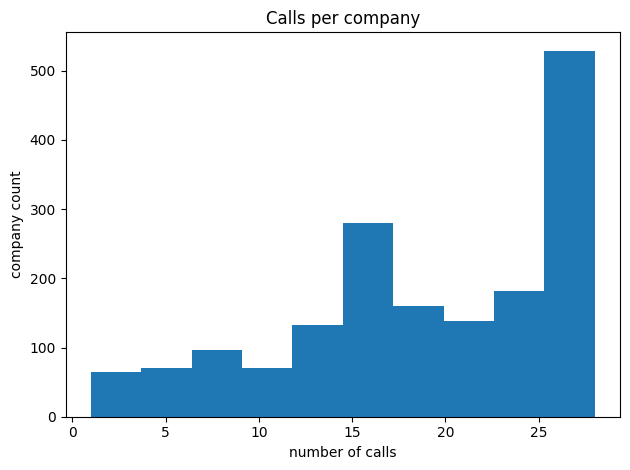

In [42]:
plt.hist(df_full.symbol.value_counts())
plt.title("Calls per company")
plt.ylabel('company count')
plt.xlabel("number of calls")
plt.tight_layout()
plt.show()

## Distribution of mismatch in date

In [50]:
def match_date(year, quarter):
    # Assign 1st quarter to Feb, 2nd to May, 3rd to Aug, 4th to Nov
    month = (quarter-1)*3 + 2
    matched_date = f"{year}-{month:02d}-01"
    return matched_date

# New calls from web
matched_date = df.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation_web = df.date - matched_date
deviation_web.describe()

count                         18346
mean     62 days 08:19:07.315000545
std      75 days 12:32:31.718200896
min             -274 days +21:19:00
25%         80 days 13:31:37.500000
50%                88 days 21:30:37
75%         96 days 13:50:10.500000
max               453 days 17:00:00
dtype: object

In [52]:
# Old calls from kaggle
matched_date = df_old.apply(lambda row: match_date(row['year'], row['quarter']), axis=1)
matched_date = pd.to_datetime(matched_date)
deviation_old = pd.to_datetime(df_old.date) - matched_date
deviation_old.describe()

count                           24580
mean     -98 days +10:08:44.914564687
std       285 days 15:44:15.304527504
min              -3078 days +00:00:00
25%                -98 days +00:00:00
50%                 -5 days +00:00:00
75%                  16 days 00:00:00
max                 194 days 00:00:00
dtype: object

In [55]:
deviation_old.head()

0   -649 days
1    -11 days
2     -7 days
3      0 days
4     -4 days
dtype: timedelta64[ns]

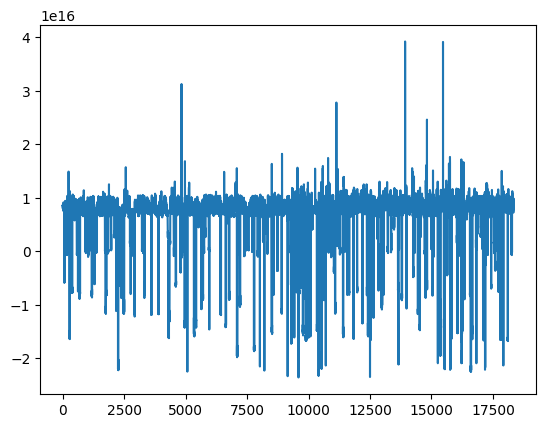

In [56]:
plt.plot(deviation_web)

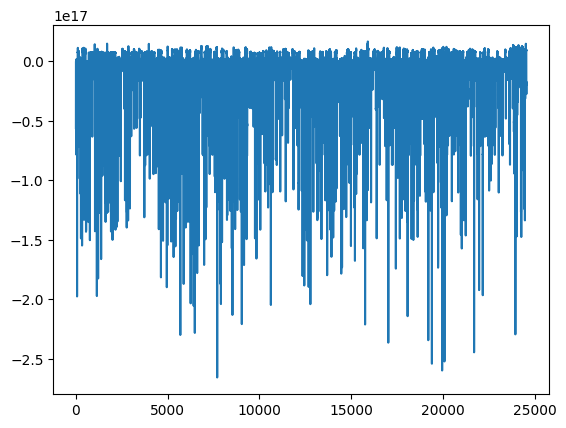

In [57]:
plt.plot(deviation_old)